# Detection and Removal of outliers 

In [2]:
import pandas as pd
import matplotlib
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [3]:
df=pd.read_csv('Route Information-Table 1.csv')
df

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,SeaRoad_CustomClearance_time_(hours),SeaRoad_Port_Airport_Rail_Handlingtime_(hours),SeaRoad_Extra_Time,SeaRoad_Transit_time_(hours),SeaRoad_Transport_tax_percent,SeaRoad_Transport_tax_charges,Sea_PCS,Sea_Costom,Sea_GSTN,Sea_Total_Cost
0,23,Delhi,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,24,48,0,72,1.2%,24,15,30,54,1903
1,24,Gurgoan,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,24,48,0,74,1.2%,12,15,15,27,1699
2,25,Faridabad,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,24,48,0,85,1.2%,4,15,5,9,1313
3,26,Patna,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,24,48,0,64,1.2%,4,15,5,9,1313
4,27,Ahmedabad,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,24,48,0,60,1.2%,24,15,30,54,1733
5,28,Surat,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,24,48,0,58,1.2%,12,15,15,27,1529
6,29,Kolkata,Hyderabad,20,Mahindra and Mahendra,Truck,800,0,0,0,...,24,48,0,62,1.2%,8,20,10,18,1156
7,30,Kolkata,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,24,48,0,71,1.2%,8,20,10,18,1156
8,31,Howra,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,24,48,0,72,1.2%,24,20,30,54,1578
9,32,Mumbai,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,24,48,0,48,1.2%,12,20,15,27,1624


### 1.Detection of outliers

In [4]:
df.describe()

,Route_Number,Container_Size(ft),Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,Road_Equipment_Cost,Road_Extra_Cost,Road_Warehouse_Cost,Road_Toll_Charges,...,SeaRoad_Transit_Duty,SeaRoad_CustomClearance_time_(hours),SeaRoad_Port_Airport_Rail_Handlingtime_(hours),SeaRoad_Extra_Time,SeaRoad_Transit_time_(hours),SeaRoad_Transport_tax_charges,Sea_PCS,Sea_Costom,Sea_GSTN,Sea_Total_Cost
count,28.000000,28.0,28.000000,28.0,28.0,28.0,28.0,28.0,16.000000,28.000000,...,28.000000,28.0,28.0,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,36.500000,20.0,975.000000,0.0,0.0,0.0,0.0,0.0,13.250000,17009.107143,...,22.714500,24.0,48.0,0.0,70.750000,12.714286,42.142857,15.892857,28.607143,1569.535714
std,8.225975,0.0,196.967754,0.0,0.0,0.0,0.0,0.0,4.809712,13754.665003,...,15.436179,0.0,0.0,0.0,11.351701,6.715693,25.034368,8.394616,15.110309,177.230229
min,23.000000,20.0,800.000000,0.0,0.0,0.0,0.0,0.0,8.000000,1290.000000,...,0.000000,24.0,48.0,0.0,44.000000,4.000000,15.000000,5.000000,9.000000,1156.000000
25%,29.750000,20.0,800.000000,0.0,0.0,0.0,0.0,0.0,9.500000,3121.250000,...,0.002000,24.0,48.0,0.0,63.500000,8.000000,20.000000,10.000000,18.000000,1487.750000
50%,36.500000,20.0,1000.000000,0.0,0.0,0.0,0.0,0.0,12.500000,16202.500000,...,24.000000,24.0,48.0,0.0,72.000000,12.000000,40.000000,15.000000,27.000000,1592.000000
75%,43.250000,20.0,1000.000000,0.0,0.0,0.0,0.0,0.0,16.250000,28270.000000,...,36.000000,24.0,48.0,0.0,77.000000,16.000000,70.000000,20.000000,36.000000,1706.000000
max,50.000000,20.0,1500.000000,0.0,0.0,0.0,0.0,0.0,20.000000,41600.000000,...,36.000000,24.0,48.0,0.0,94.000000,24.000000,70.000000,30.000000,54.000000,1903.000000


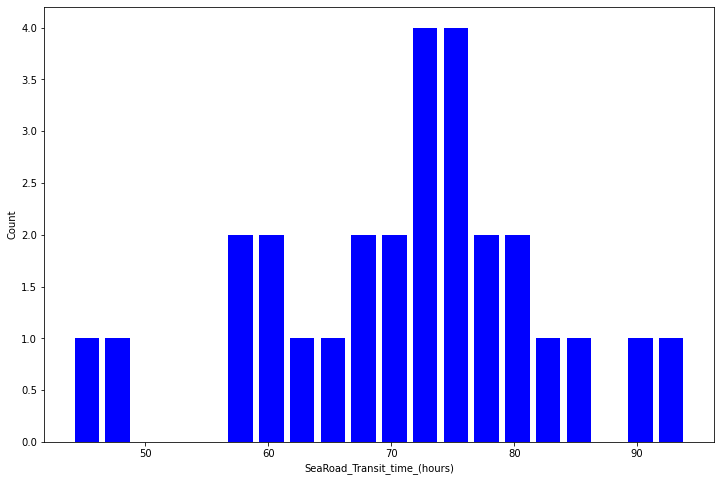

In [5]:
plt.hist(df['SeaRoad_Transit_time_(hours)'],bins=20,rwidth=0.8,color='blue')
plt.xlabel('SeaRoad_Transit_time_(hours)')
plt.ylabel('Count')
plt.show()

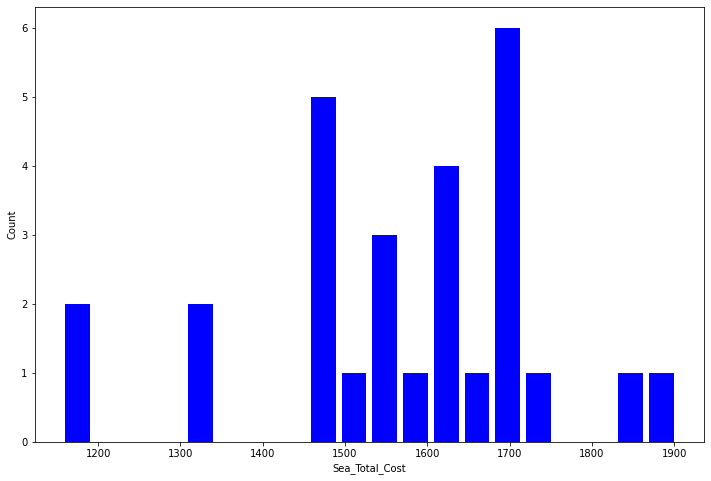

In [6]:
plt.hist(df['Sea_Total_Cost'],bins=20,rwidth=0.8,color='blue')
plt.xlabel('Sea_Total_Cost')
plt.ylabel('Count')
plt.show()

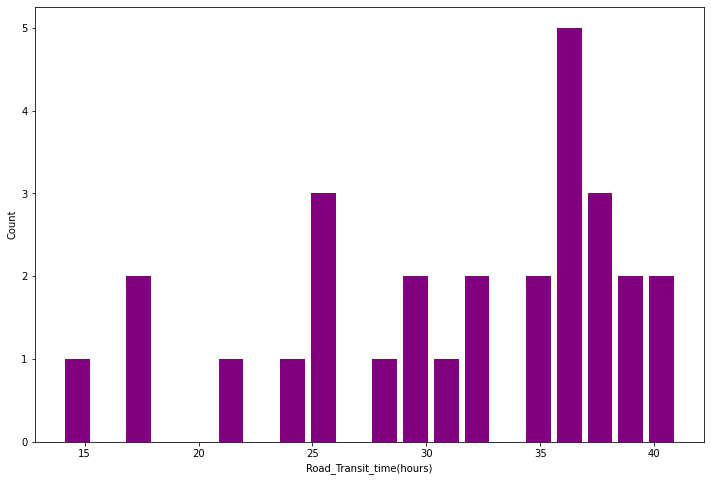

In [7]:
plt.hist(df['Road_Transit_time(hours)'],bins=20,rwidth=0.8,color='purple')
plt.xlabel('Road_Transit_time(hours)')
plt.ylabel('Count')
plt.show()

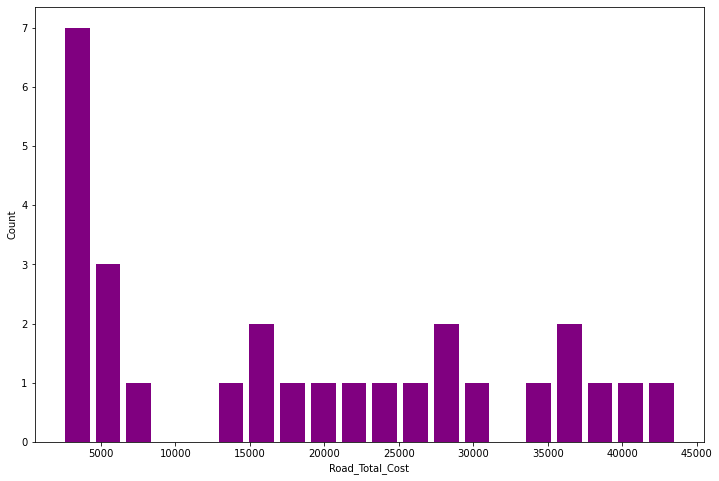

In [8]:
plt.hist(df['Road_Total_Cost'],bins=20,rwidth=0.8,color='purple')
plt.xlabel('Road_Total_Cost')
plt.ylabel('Count')
plt.show()

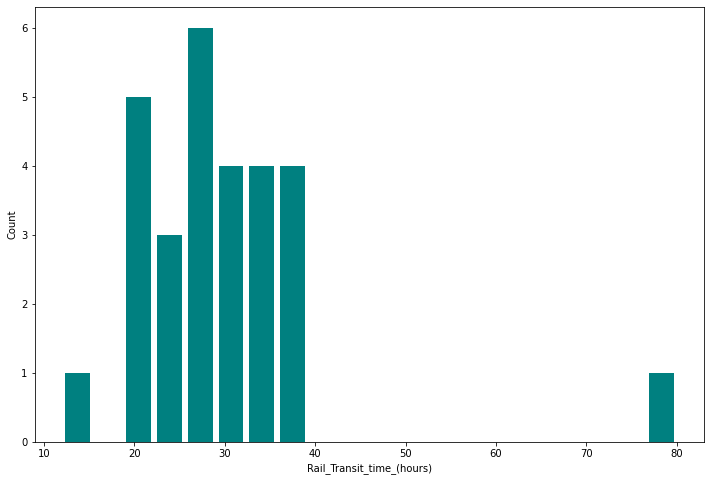

In [9]:
plt.hist(df['Rail_Transit_time_(hours)'],bins=20,rwidth=0.8,color='teal')
plt.xlabel('Rail_Transit_time_(hours)')
plt.ylabel('Count')
plt.show()

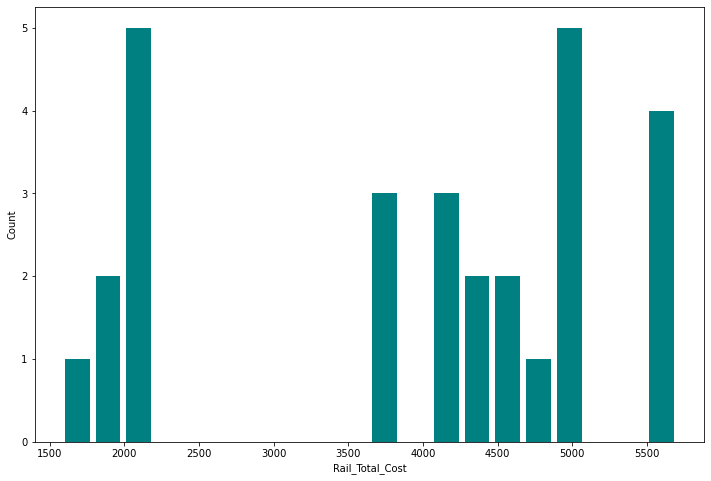

In [10]:
plt.hist(df['Rail_Total_Cost'],bins=20,rwidth=0.8,color='teal')
plt.xlabel('Rail_Total_Cost')
plt.ylabel('Count')
plt.show()

### To check whether the histogram satisfies the bell curve

<AxesSubplot:xlabel='Rail_Total_Cost', ylabel='Count'>

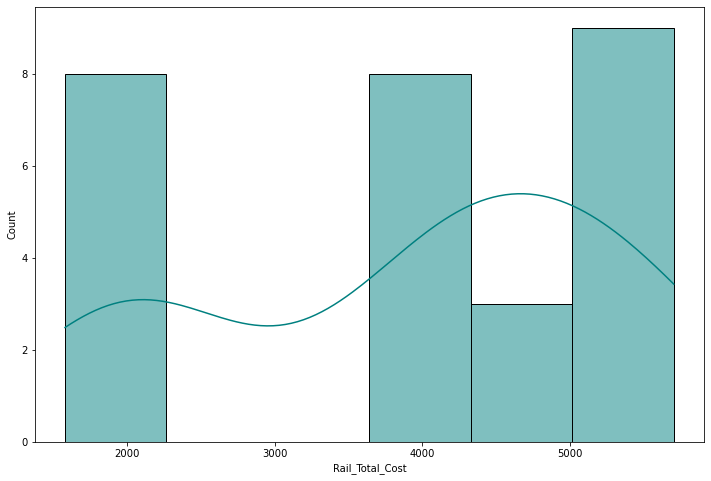

In [12]:
sn.histplot(df['Rail_Total_Cost'],kde=True,color='teal')

<AxesSubplot:xlabel='Road_Total_Cost', ylabel='Count'>

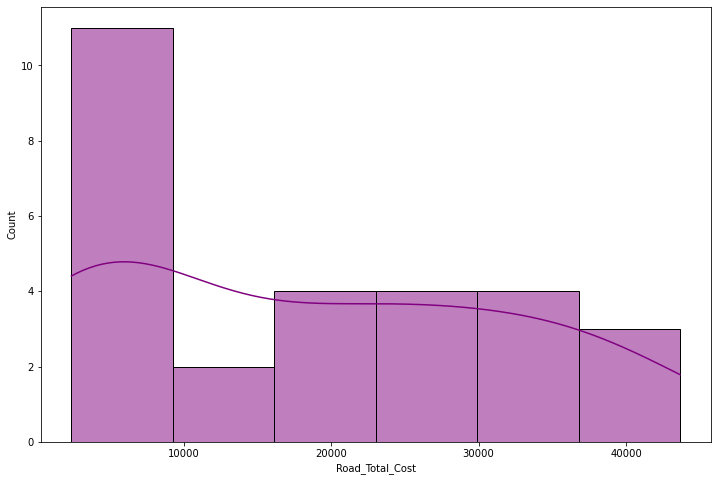

In [14]:
sn.histplot(df['Road_Total_Cost'],kde=True,color='purple')

<AxesSubplot:xlabel='Sea_Total_Cost', ylabel='Count'>

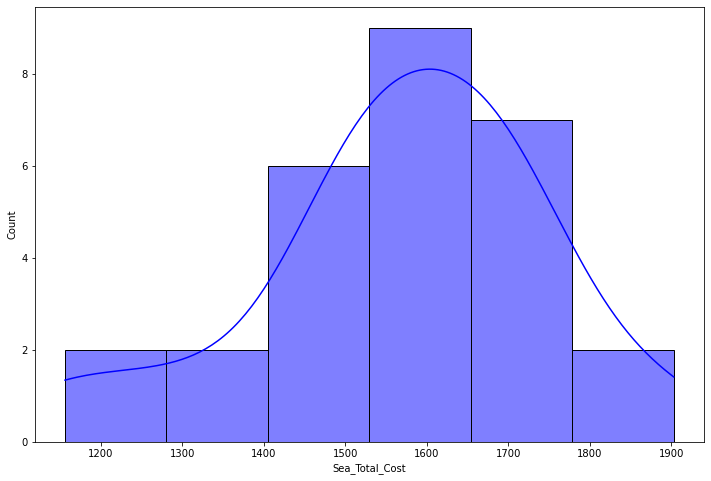

In [15]:
sn.histplot(df['Sea_Total_Cost'],kde=True,color='blue')

<AxesSubplot:xlabel='Rail_Transit_time_(hours)', ylabel='Count'>

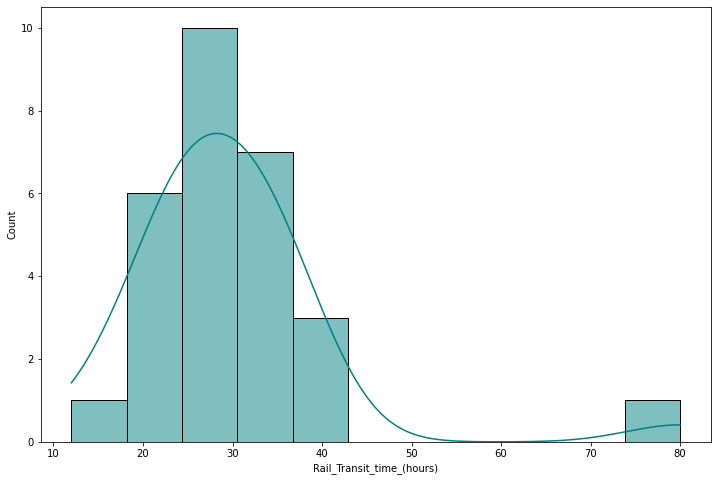

In [16]:
sn.histplot(df['Rail_Transit_time_(hours)'],kde=True,color='teal')

<AxesSubplot:xlabel='Road_Transit_time(hours)', ylabel='Count'>

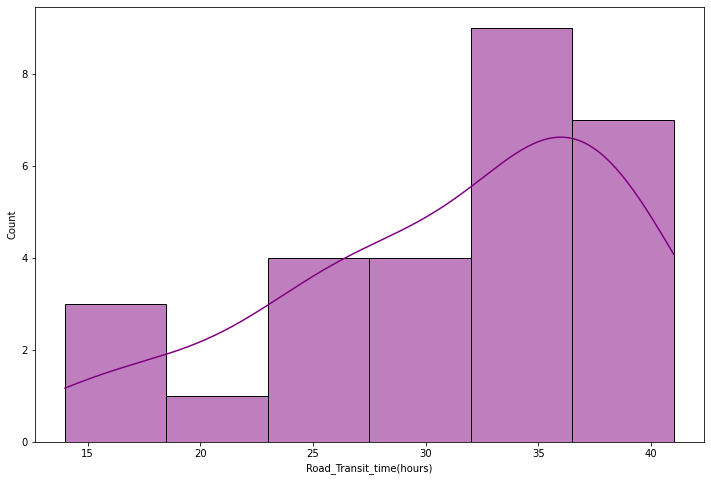

In [17]:
sn.histplot(df['Road_Transit_time(hours)'],kde=True,color='purple')

<AxesSubplot:xlabel='SeaRoad_Transit_time_(hours)', ylabel='Count'>

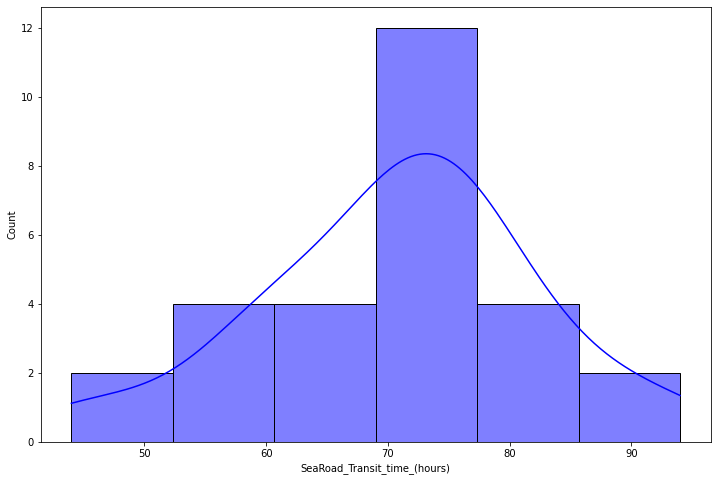

In [18]:
sn.histplot(df['SeaRoad_Transit_time_(hours)'],kde=True,color='blue')

## Appling log function to the dataset so as to get a clear difference between individual data points

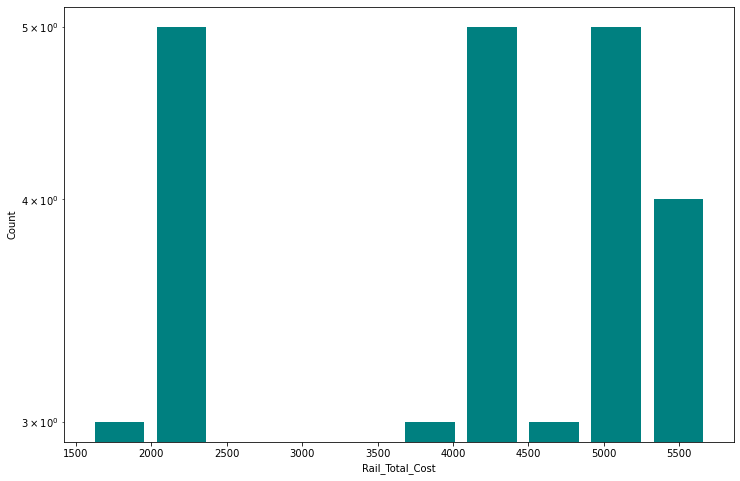

In [19]:
plt.hist(df['Rail_Total_Cost'],bins=10,rwidth=0.8,color='teal')
plt.xlabel('Rail_Total_Cost')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

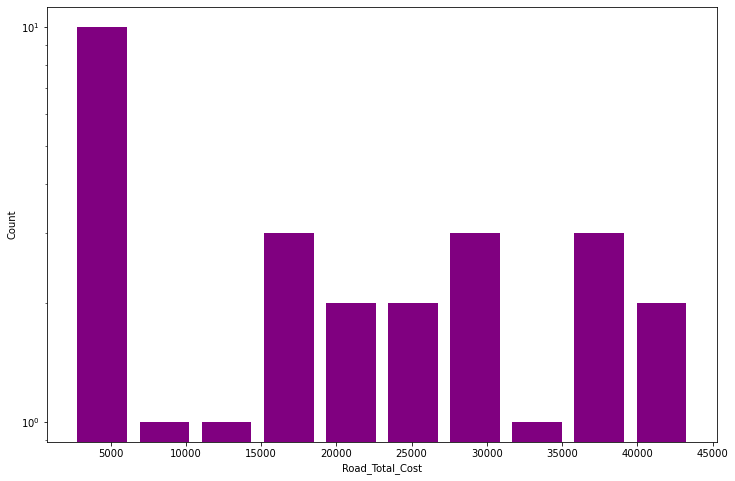

In [20]:
plt.hist(df['Road_Total_Cost'],bins=10,rwidth=0.8,color='purple')
plt.xlabel('Road_Total_Cost')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

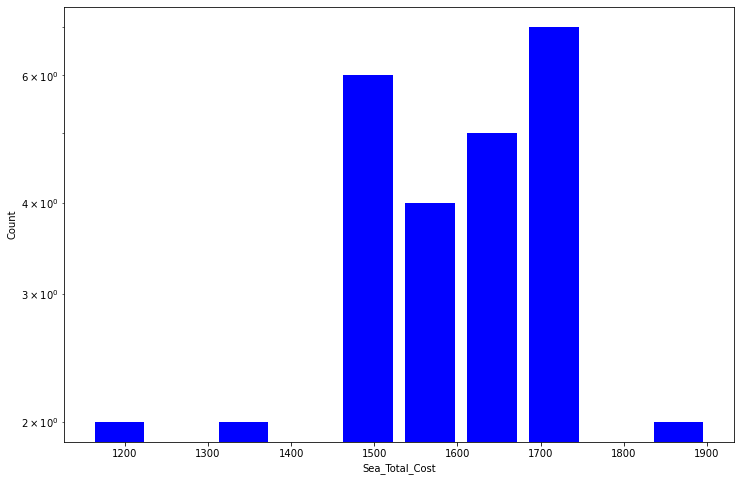

In [21]:
plt.hist(df['Sea_Total_Cost'],bins=10,rwidth=0.8,color='blue')
plt.xlabel('Sea_Total_Cost')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

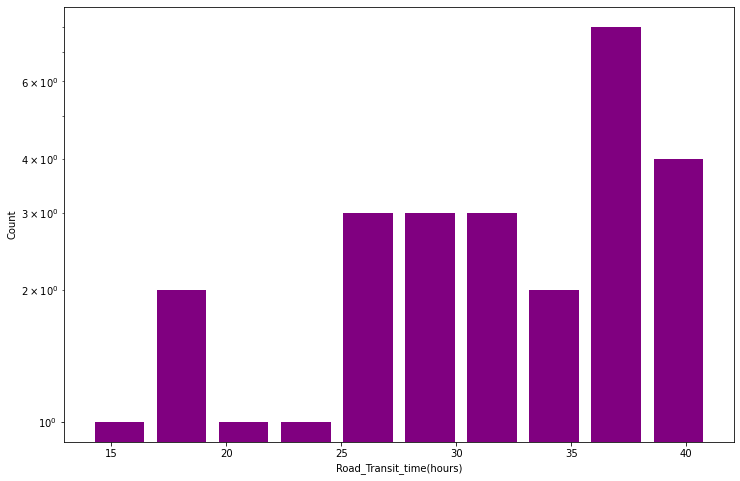

In [22]:
plt.hist(df['Road_Transit_time(hours)'],bins=10,rwidth=0.8,color='purple')
plt.xlabel('Road_Transit_time(hours)')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

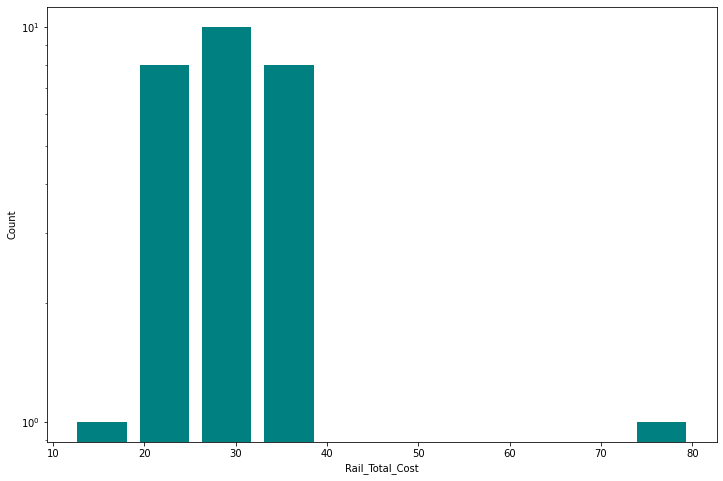

In [23]:
plt.hist(df['Rail_Transit_time_(hours)'],bins=10,rwidth=0.8,color='teal')
plt.xlabel('Rail_Total_Cost')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

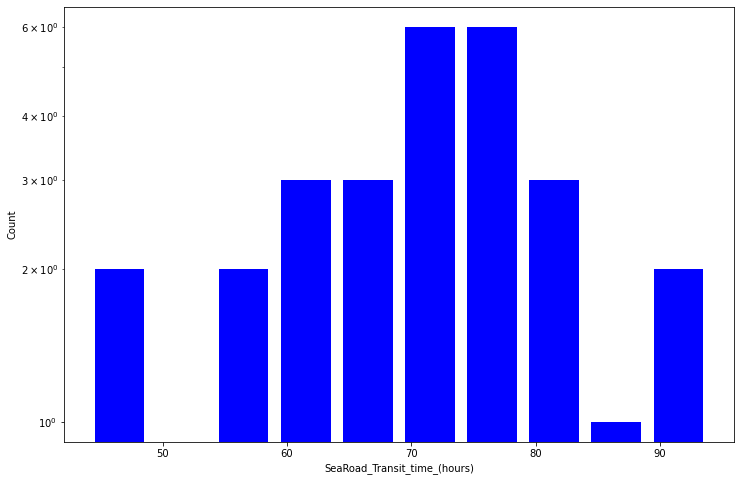

In [24]:
plt.hist(df['SeaRoad_Transit_time_(hours)'],bins=10,rwidth=0.8,color='blue')
plt.xlabel('SeaRoad_Transit_time_(hours)')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

### 2.Now to remove outliers using z score.use z score of 3 as your threshold

In [33]:
df['zscore1']=(df['Rail_Total_Cost']-df['Rail_Total_Cost'].mean())/df['Rail_Total_Cost'].std()
df

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_PCS,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5
0,23,Delhi,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,30,54,1903,-1.273251,-1.273251,-1.007778,1.881532,0.899105,0.357915
1,24,Gurgoan,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,15,27,1699,-1.273251,-1.273251,-1.000904,0.730486,0.631286,0.529224
2,25,Faridabad,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,5,9,1313,-1.273251,-1.273251,-1.012843,-1.447472,0.631286,0.443569
3,26,Patna,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,5,9,1313,-1.493147,-1.493147,-1.057705,-1.447472,-0.306078,-0.156014
4,27,Ahmedabad,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,30,54,1733,-1.309900,-1.309900,-0.991497,0.922327,-1.243443,-0.755598
5,28,Surat,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,15,27,1529,-1.309900,-1.309900,-0.951701,-0.228718,-1.779080,-0.841252
6,29,Kolkata,Hyderabad,20,Mahindra and Mahendra,Truck,800,0,0,0,...,20,10,18,1156,-1.725504,-1.725504,-1.122248,-2.333325,-0.306078,-0.327324
7,30,Kolkata,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,10,18,1156,-1.549587,-1.549587,-1.105606,-2.333325,0.631286,0.272260
8,31,Howra,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,30,54,1578,-0.193561,-0.193561,-0.138180,0.047759,0.497377,0.357915
9,32,Mumbai,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,15,27,1624,-0.193561,-0.193561,-1.155171,0.307308,-1.912989,-0.926907


In [26]:
df['zscore2']=(df['Road_Total_Cost']-df['Road_Total_Cost'].mean())/df['Road_Total_Cost'].std()
df

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,SeaRoad_Transit_time_(hours),SeaRoad_Transport_tax_percent,SeaRoad_Transport_tax_charges,Sea_PCS,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2
0,23,Delhi,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,72,1.2%,24,15,30,54,1903,-1.273251,-1.273251,-1.007778
1,24,Gurgoan,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,74,1.2%,12,15,15,27,1699,-1.273251,-1.273251,-1.000904
2,25,Faridabad,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,85,1.2%,4,15,5,9,1313,-1.273251,-1.273251,-1.012843
3,26,Patna,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,64,1.2%,4,15,5,9,1313,-1.493147,-1.493147,-1.057705
4,27,Ahmedabad,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,60,1.2%,24,15,30,54,1733,-1.309900,-1.309900,-0.991497
5,28,Surat,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,58,1.2%,12,15,15,27,1529,-1.309900,-1.309900,-0.951701
6,29,Kolkata,Hyderabad,20,Mahindra and Mahendra,Truck,800,0,0,0,...,62,1.2%,8,20,10,18,1156,-1.725504,-1.725504,-1.122248
7,30,Kolkata,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,71,1.2%,8,20,10,18,1156,-1.549587,-1.549587,-1.105606
8,31,Howra,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,72,1.2%,24,20,30,54,1578,-0.193561,-0.193561,-0.138180
9,32,Mumbai,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,48,1.2%,12,20,15,27,1624,-0.193561,-0.193561,-1.155171


In [27]:
df['zscore3']=(df['Sea_Total_Cost']-df['Sea_Total_Cost'].mean())/df['Sea_Total_Cost'].std()
df

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,SeaRoad_Transport_tax_percent,SeaRoad_Transport_tax_charges,Sea_PCS,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3
0,23,Delhi,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,1.2%,24,15,30,54,1903,-1.273251,-1.273251,-1.007778,1.881532
1,24,Gurgoan,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,1.2%,12,15,15,27,1699,-1.273251,-1.273251,-1.000904,0.730486
2,25,Faridabad,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,1.2%,4,15,5,9,1313,-1.273251,-1.273251,-1.012843,-1.447472
3,26,Patna,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,1.2%,4,15,5,9,1313,-1.493147,-1.493147,-1.057705,-1.447472
4,27,Ahmedabad,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,1.2%,24,15,30,54,1733,-1.309900,-1.309900,-0.991497,0.922327
5,28,Surat,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,1.2%,12,15,15,27,1529,-1.309900,-1.309900,-0.951701,-0.228718
6,29,Kolkata,Hyderabad,20,Mahindra and Mahendra,Truck,800,0,0,0,...,1.2%,8,20,10,18,1156,-1.725504,-1.725504,-1.122248,-2.333325
7,30,Kolkata,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,1.2%,8,20,10,18,1156,-1.549587,-1.549587,-1.105606,-2.333325
8,31,Howra,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,1.2%,24,20,30,54,1578,-0.193561,-0.193561,-0.138180,0.047759
9,32,Mumbai,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,1.2%,12,20,15,27,1624,-0.193561,-0.193561,-1.155171,0.307308


In [31]:
df['zscore4']=(df['Road_Transit_time(hours)']-df['Road_Transit_time(hours)'].mean())/df['Road_Transit_time(hours)'].std()
df

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_PCS,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5
0,23,Delhi,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,30,54,1903,-1.273251,-1.273251,-1.007778,1.881532,0.899105,0.357915
1,24,Gurgoan,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,15,27,1699,-1.273251,-1.273251,-1.000904,0.730486,0.631286,0.529224
2,25,Faridabad,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,5,9,1313,-1.273251,-1.273251,-1.012843,-1.447472,0.631286,0.443569
3,26,Patna,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,5,9,1313,-1.493147,-1.493147,-1.057705,-1.447472,-0.306078,-0.156014
4,27,Ahmedabad,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,30,54,1733,-1.309900,-1.309900,-0.991497,0.922327,-1.243443,-0.755598
5,28,Surat,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,15,27,1529,-1.309900,-1.309900,-0.951701,-0.228718,-1.779080,-0.841252
6,29,Kolkata,Hyderabad,20,Mahindra and Mahendra,Truck,800,0,0,0,...,20,10,18,1156,-1.725504,-1.725504,-1.122248,-2.333325,-0.306078,-0.327324
7,30,Kolkata,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,10,18,1156,-1.549587,-1.549587,-1.105606,-2.333325,0.631286,0.272260
8,31,Howra,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,30,54,1578,-0.193561,-0.193561,-0.138180,0.047759,0.497377,0.357915
9,32,Mumbai,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,15,27,1624,-0.193561,-0.193561,-1.155171,0.307308,-1.912989,-0.926907


In [32]:
df['zscore5']=(df['Rail_Transit_time_(hours)']-df['Rail_Transit_time_(hours)'].mean())/df['Rail_Transit_time_(hours)'].std()
df

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_PCS,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5
0,23,Delhi,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,30,54,1903,-1.273251,-1.273251,-1.007778,1.881532,0.899105,0.357915
1,24,Gurgoan,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,15,27,1699,-1.273251,-1.273251,-1.000904,0.730486,0.631286,0.529224
2,25,Faridabad,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,5,9,1313,-1.273251,-1.273251,-1.012843,-1.447472,0.631286,0.443569
3,26,Patna,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,5,9,1313,-1.493147,-1.493147,-1.057705,-1.447472,-0.306078,-0.156014
4,27,Ahmedabad,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,30,54,1733,-1.309900,-1.309900,-0.991497,0.922327,-1.243443,-0.755598
5,28,Surat,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,15,27,1529,-1.309900,-1.309900,-0.951701,-0.228718,-1.779080,-0.841252
6,29,Kolkata,Hyderabad,20,Mahindra and Mahendra,Truck,800,0,0,0,...,20,10,18,1156,-1.725504,-1.725504,-1.122248,-2.333325,-0.306078,-0.327324
7,30,Kolkata,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,10,18,1156,-1.549587,-1.549587,-1.105606,-2.333325,0.631286,0.272260
8,31,Howra,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,30,54,1578,-0.193561,-0.193561,-0.138180,0.047759,0.497377,0.357915
9,32,Mumbai,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,20,15,27,1624,-0.193561,-0.193561,-1.155171,0.307308,-1.912989,-0.926907


In [34]:
df['zscore6']=(df['SeaRoad_Transit_time_(hours)']-df['SeaRoad_Transit_time_(hours)'].mean())/df['SeaRoad_Transit_time_(hours)'].std()
df

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6
0,23,Delhi,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,30,54,1903,-1.273251,-1.273251,-1.007778,1.881532,0.899105,0.357915,0.110116
1,24,Gurgoan,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,15,27,1699,-1.273251,-1.273251,-1.000904,0.730486,0.631286,0.529224,0.286301
2,25,Faridabad,Bangalore,20,Ashok Leyland,Truck,1000,0,0,0,...,5,9,1313,-1.273251,-1.273251,-1.012843,-1.447472,0.631286,0.443569,1.255318
3,26,Patna,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,5,9,1313,-1.493147,-1.493147,-1.057705,-1.447472,-0.306078,-0.156014,-0.594625
4,27,Ahmedabad,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,30,54,1733,-1.309900,-1.309900,-0.991497,0.922327,-1.243443,-0.755598,-0.946995
5,28,Surat,Hyderabad,20,Ashok Leyland,Truck,1000,0,0,0,...,15,27,1529,-1.309900,-1.309900,-0.951701,-0.228718,-1.779080,-0.841252,-1.123180
6,29,Kolkata,Hyderabad,20,Mahindra and Mahendra,Truck,800,0,0,0,...,10,18,1156,-1.725504,-1.725504,-1.122248,-2.333325,-0.306078,-0.327324,-0.770810
7,30,Kolkata,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,10,18,1156,-1.549587,-1.549587,-1.105606,-2.333325,0.631286,0.272260,0.022023
8,31,Howra,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,30,54,1578,-0.193561,-0.193561,-0.138180,0.047759,0.497377,0.357915,0.110116
9,32,Mumbai,Bangalore,20,Ashok Leyland,Truck,800,0,0,0,...,15,27,1624,-0.193561,-0.193561,-1.155171,0.307308,-1.912989,-0.926907,-2.004105


In [72]:
outliers_z1=df[(df.zscore1<-3)|(df.zscore1>3)]
outliers_z1.shape

(0, 73)

In [73]:
outliers_z2=df[(df.zscore2<-3)|(df.zscore2>3)]
outliers_z2.shape

(0, 73)

In [74]:
outliers_z3=df[(df.zscore3<-3)|(df.zscore3>3)]
outliers_z3.shape

(0, 73)

In [75]:
outliers_z4=df[(df.zscore4<-3)|(df.zscore4>3)]
outliers_z4.shape

(0, 73)

In [76]:
outliers_z5=df[(df.zscore5<-3)|(df.zscore5>3)]
outliers_z5.shape

(1, 73)

In [77]:
outliers_z6=df[(df.zscore6<-3)|(df.zscore6>3)]
outliers_z6.shape

(0, 73)

In [78]:
outliers_z1.head(5)

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6


In [79]:
outliers_z2.head(5)

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6


In [80]:
outliers_z3.head(5)

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6


In [81]:
outliers_z4.head(5)

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6


In [82]:
outliers_z5.head(5)

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6
11,34,Howra,Hyderabad,20,Ashok Leyland,Truck,800,0,0,0,...,5,9,1488,0.172933,0.172933,-0.013363,-0.460055,-0.439988,4.298035,0.991041


In [83]:
outliers_z6.head(5)

,Route_Number,Source,Destination,Container_Size(ft),Road_Carrier,Road_Travel_Mode,Road_Fixed_Freight_Cost,Road_Handling_Cost,Road_Bunker/_Fuel_Cost,Road_Documentation_Cost,...,Sea_Costom,Sea_GSTN,Sea_Total_Cost,zscore,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6


In [84]:
df2=df[(df.zscore1>-3)&(df.zscore1<3)]
df2.shape

(28, 73)

In [85]:
df3=df[(df.zscore2>-3)&(df.zscore2<3)]
df3.shape

(28, 73)

In [86]:
df4=df[(df.zscore3>-3)&(df.zscore3<3)]
df4.shape

(28, 73)

In [87]:
df5=df[(df.zscore4>-3)&(df.zscore4<3)]
df5.shape

(28, 73)

In [88]:
df6=df[(df.zscore5>-3)&(df.zscore5<3)]
df6.shape

(27, 73)

In [89]:
df7=df[(df.zscore6>-3)&(df.zscore6<3)]
df7.shape

(28, 73)

In [90]:
df.shape[0]-df2.shape[0]

0

In [91]:
df.shape[0]-df3.shape[0]

0

In [92]:
df.shape[0]-df4.shape[0]

0

In [93]:
df.shape[0]-df5.shape[0]

0

In [94]:
df.shape[0]-df6.shape[0] #Rail_Transit_time(hours) has one outlier

1

In [71]:
df.shape[0]-df7.shape[0]

0

There were no outliers except in Rail_Transit_time(hours) which had one outlier and this outlier was successfully removed
